In [1]:
import sys
import matplotlib
import scipy as sp
import IPython
import sklearn
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('DataOutput.xlsx')

In [3]:
df = data.iloc[:,1:len(data.columns)]
columns = df.columns
print(df.columns)

Index(['KMF', 'Class I TBs', 'Class II TBs', 'Number of N3', 'MW',
       'Number of N', 'Number of O', 'Number of C', 'H Bond Ratio',
       'Oxygen Balance', 'NO2 adj to NO2', 'NO2 adj to NH2', 'NO2 adj to CO',
       'NO2 adj to CH3', 'NO2 adj to OH', 'NO2 adj to NH', 'Rot Bonds',
       'Num Heteroatoms', 'Total Rings', 'Aromatic Rings', 'Aliphatic Rings',
       'VSAEState8', 'SMRVSA5', 'TPSA'],
      dtype='object')


In [4]:
df

,KMF,Class I TBs,Class II TBs,Number of N3,MW,Number of N,Number of O,Number of C,H Bond Ratio,Oxygen Balance,...,NO2 adj to OH,NO2 adj to NH,Rot Bonds,Num Heteroatoms,Total Rings,Aromatic Rings,Aliphatic Rings,VSAEState8,SMRVSA5,TPSA
0,4.257130,6,0,0,348.096,6,12,6,0.000000,0.000000,...,0,0,6,18,1,1,0,0.000000,0.000000,258.84
1,3.328687,6,12,0,438.186,12,12,6,0.000000,-10.954252,...,0,0,6,24,5,0,5,0.000000,36.994654,278.28
2,4.180729,4,8,0,296.156,8,8,4,0.000000,-21.610232,...,0,0,4,16,1,0,1,-3.798889,0.000000,185.52
3,2.682242,3,6,0,222.117,6,6,3,0.000000,-21.610232,...,0,0,3,12,1,0,1,-1.778750,0.000000,139.14
4,2.790699,3,0,0,227.132,3,6,7,0.000000,-73.965800,...,0,0,3,9,1,1,0,1.166659,6.923737,129.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,2.610254,3,0,0,230.092,4,7,5,0.000000,-27.814961,...,0,0,3,11,1,1,0,0.000000,0.000000,156.36
481,8.066203,8,0,0,621.304,11,16,17,0.210526,-55.367421,...,0,6,12,27,3,3,0,0.000000,0.000000,382.07
482,6.938144,6,0,0,531.310,9,12,17,0.266667,-79.802752,...,0,4,10,21,3,3,0,0.000000,0.000000,295.79
483,2.295325,3,0,0,217.097,5,6,4,0.125000,-25.794921,...,0,0,4,11,1,1,0,0.000000,5.786795,158.10


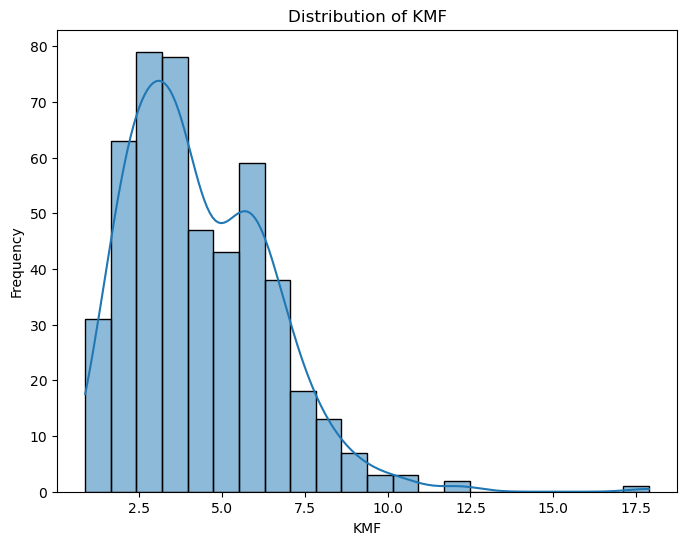

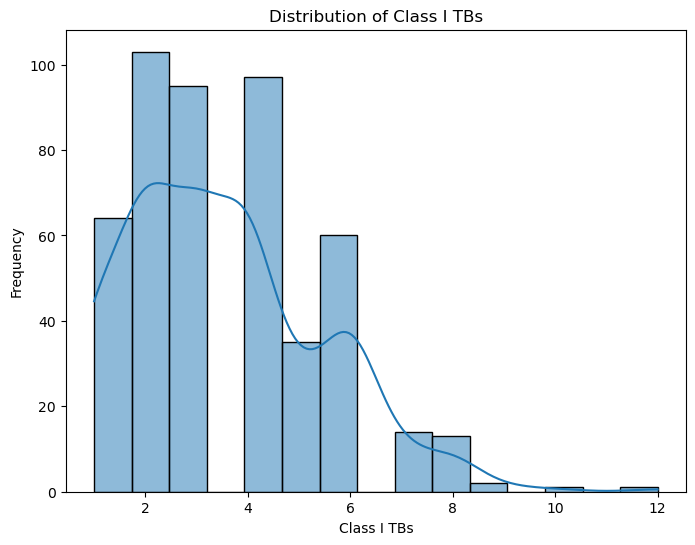

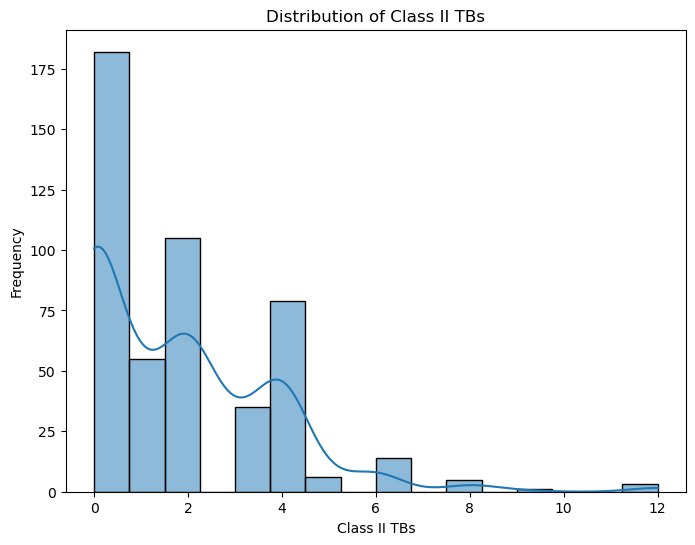

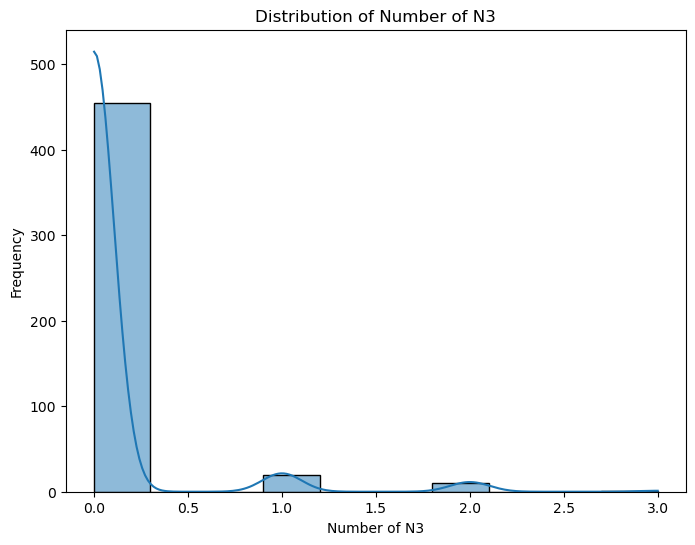

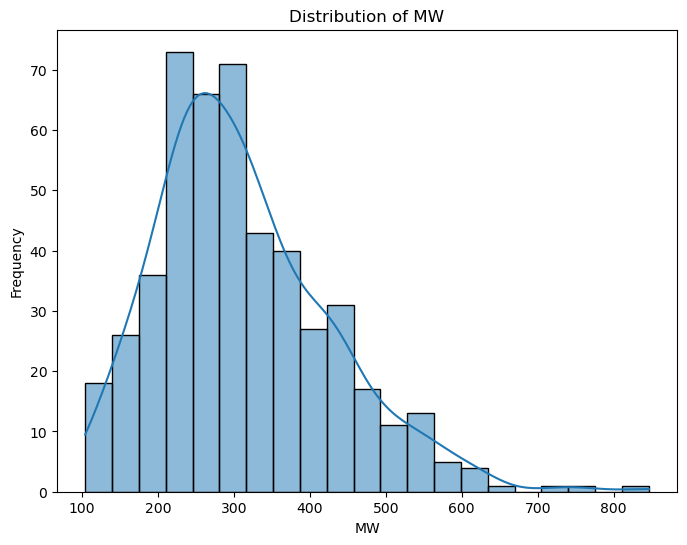

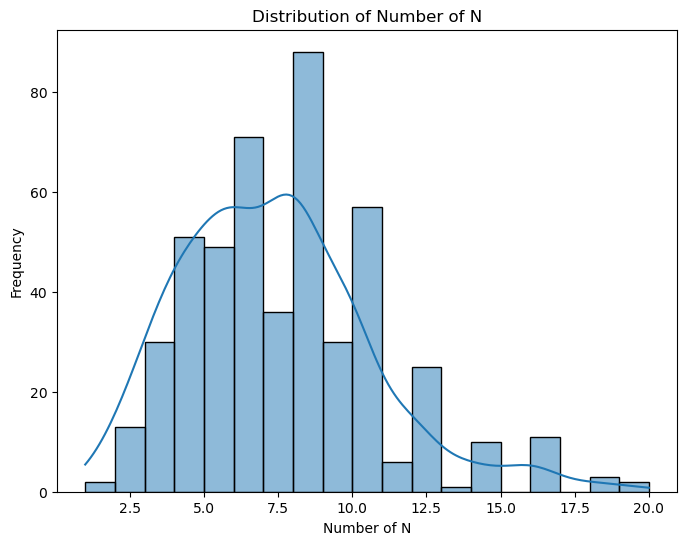

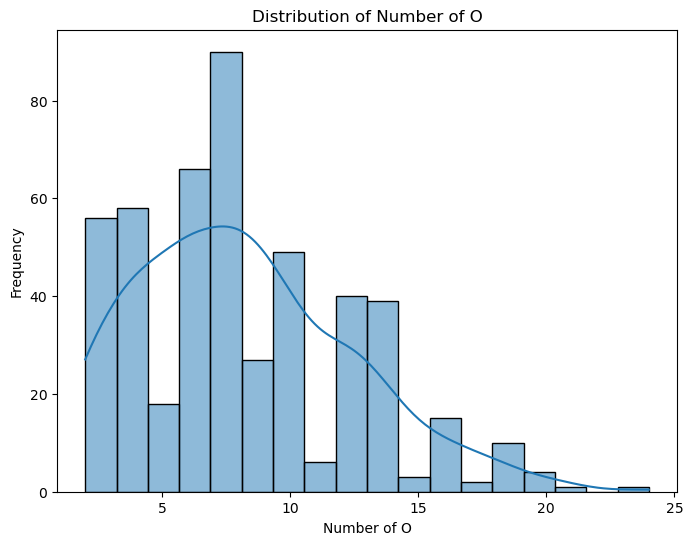

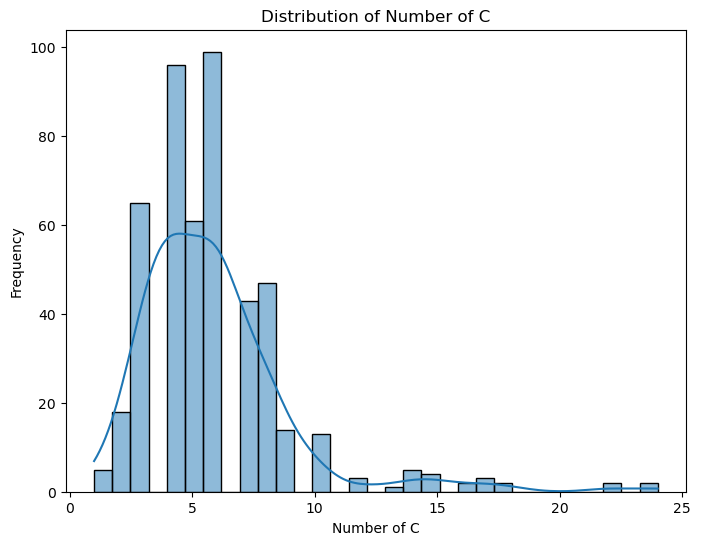

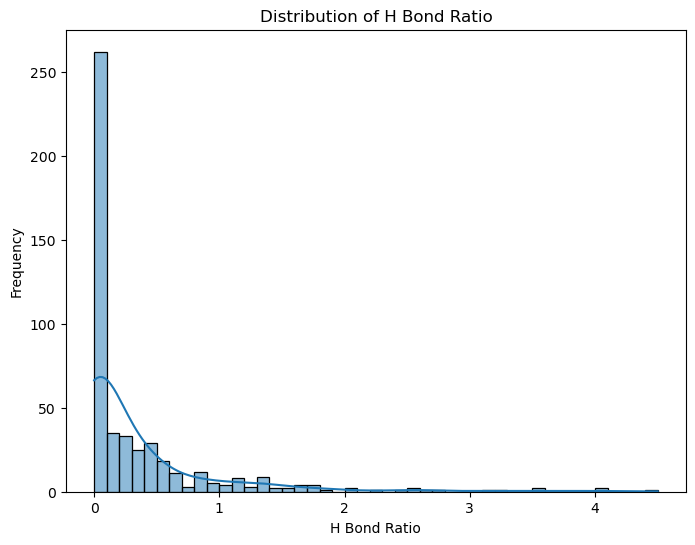

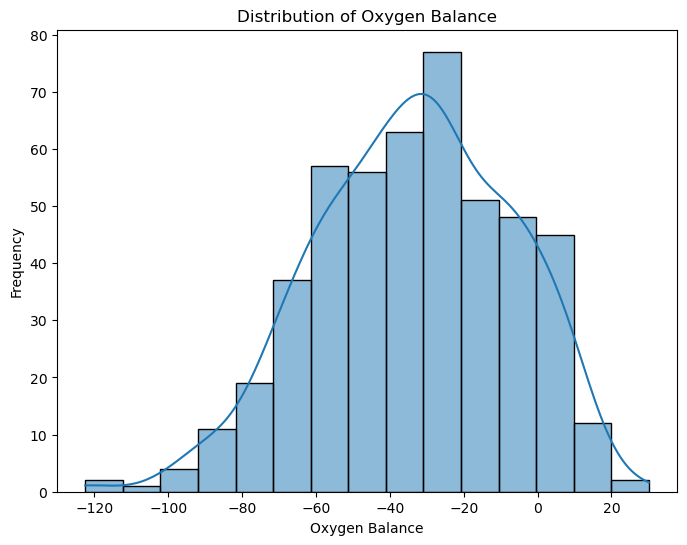

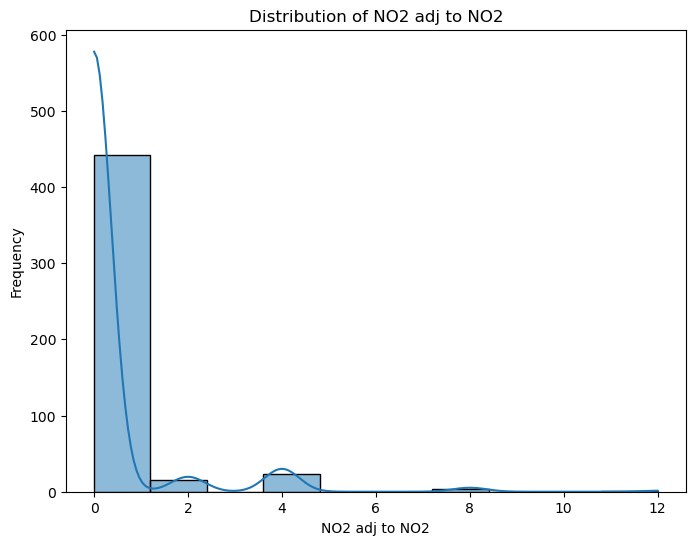

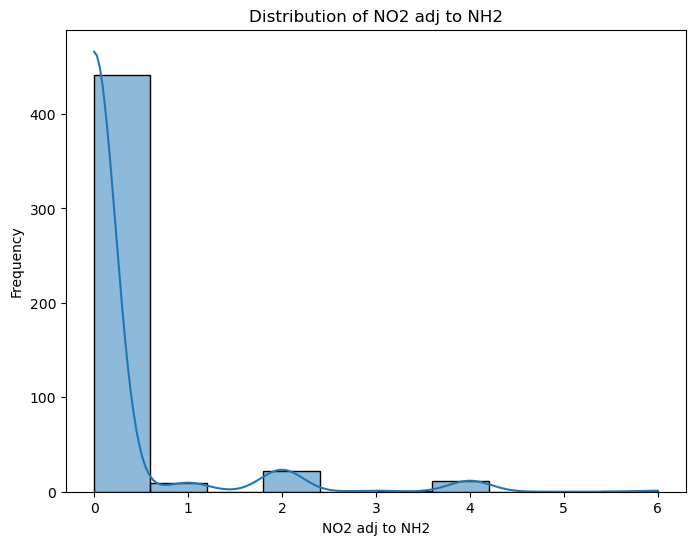

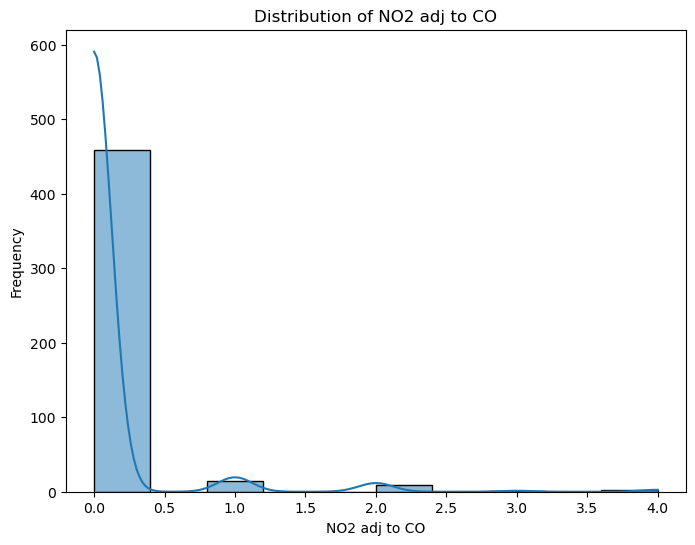

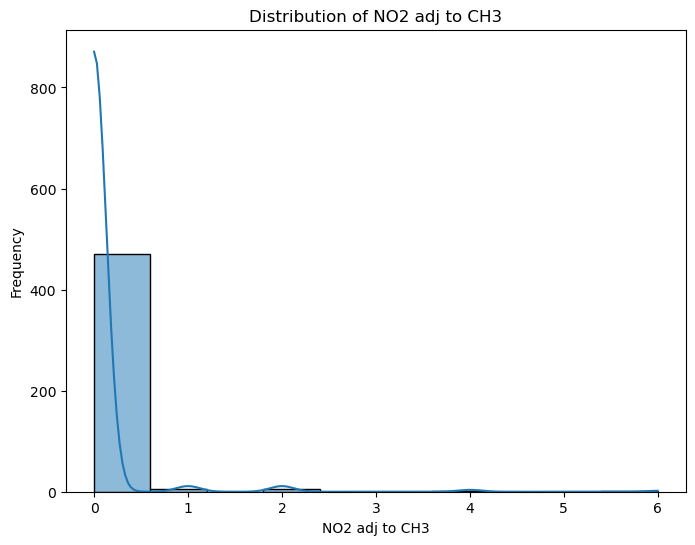

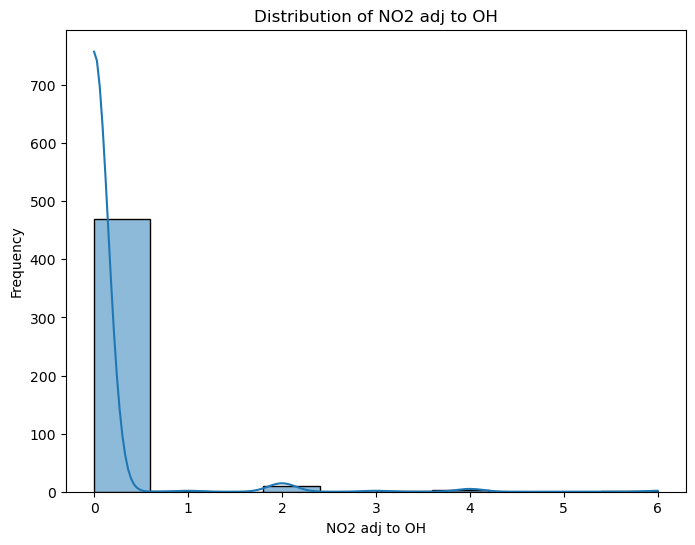

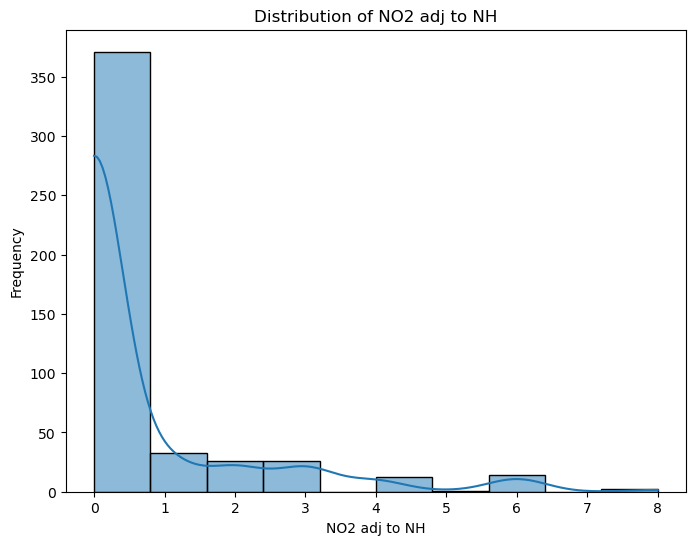

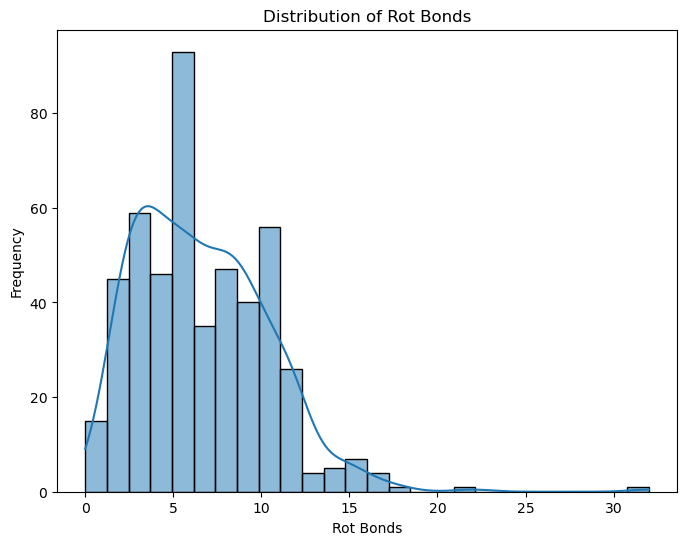

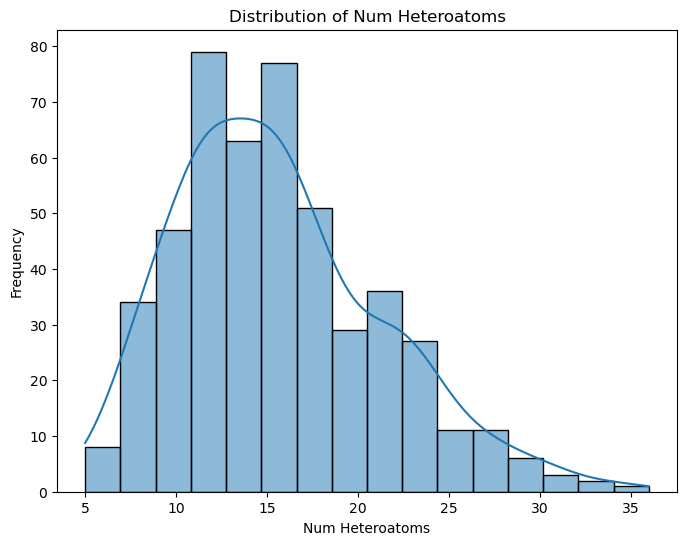

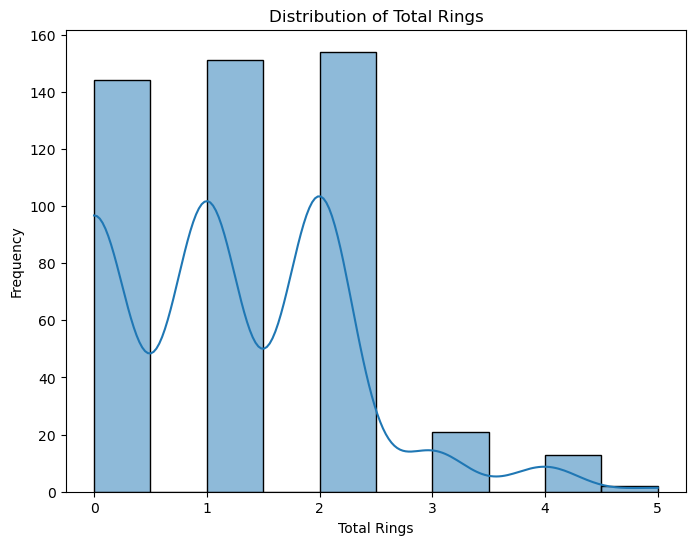

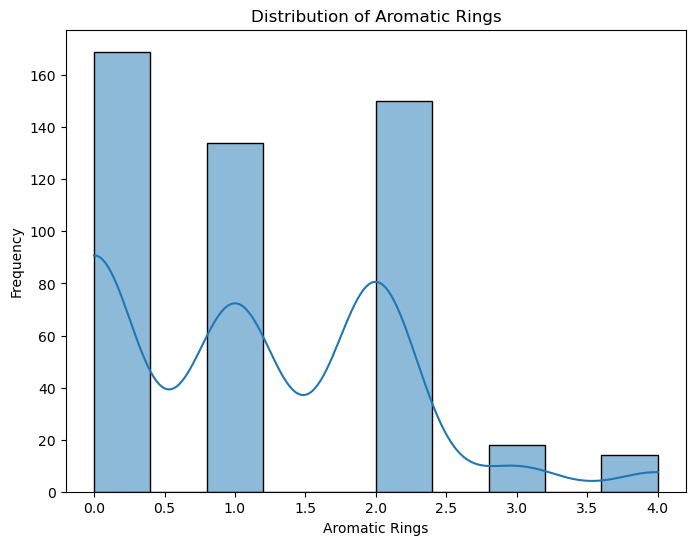

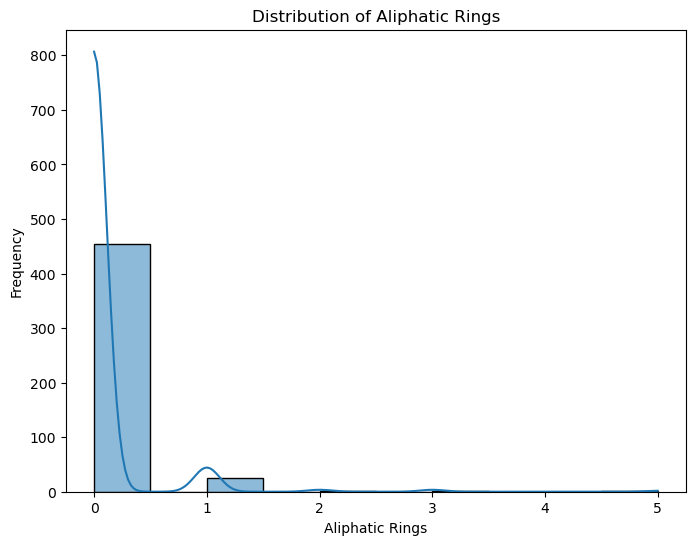

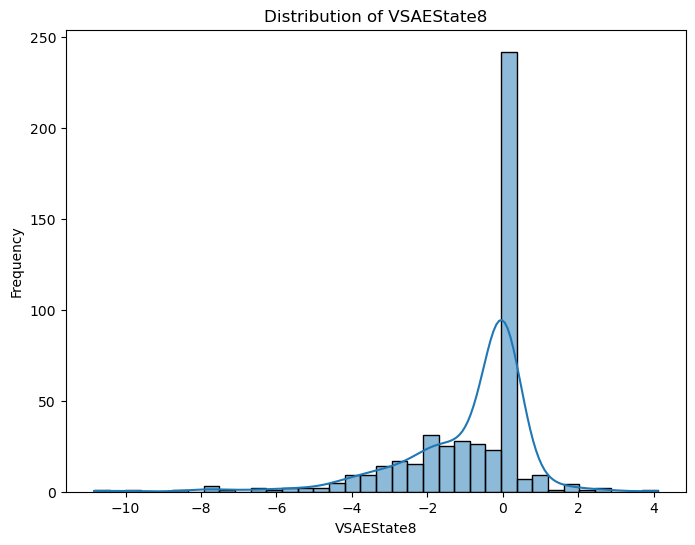

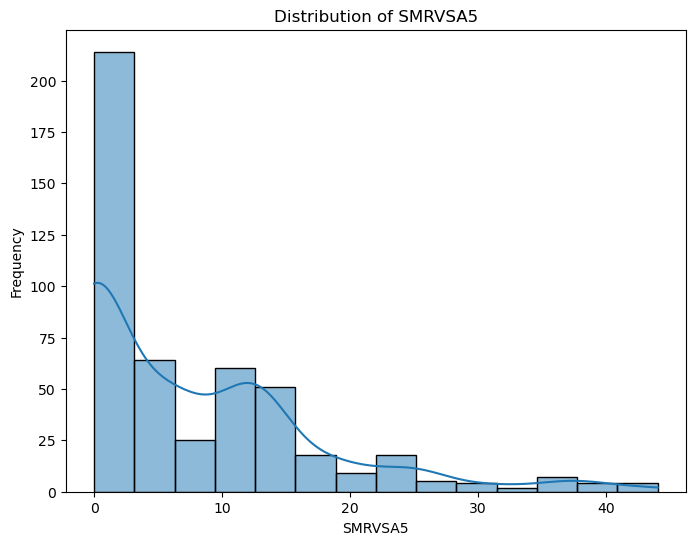

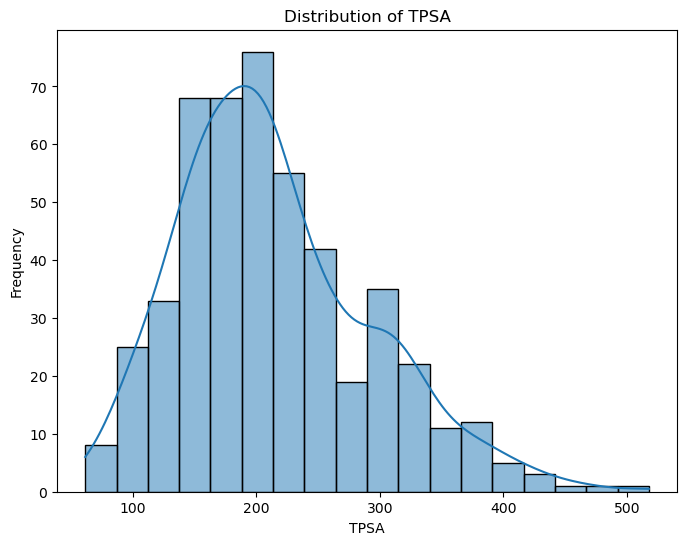

In [5]:
for column in columns[:24]:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [6]:
# Log transform for skewed continuous features
log_transformer = FunctionTransformer(np.log1p, validate=True)

# Scaling transformers
# minmax_scaler = MinMaxScaler()

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_transformer, ['KMF', 'Class I TBs', 'Class II TBs', 'Number of O', 'Number of C', 'H Bond Ratio', 'SMRVSA5']),
    ],
    remainder='passthrough'
)

In [9]:
columnsprocessed = ['KMF', 'Class I TBs', 'Class II TBs', 'Number of O', 'Number of C', 'H Bond Ratio', 'SMRVSA5', 'Number of N3', 'MW',
'Number of N', 'Oxygen Balance', 'NO2 adj to NO2', 'NO2 adj to NH2', 'NO2 adj to CO', 'NO2 adj to CH3', 'NO2 adj to OH', 
'NO2 adj to NH','Rot Bonds', 'Num Heteroatoms', 'Total Rings', 'Aromatic Rings', 'Aliphatic Rings', 'VSAEState8', 'TPSA']

In [10]:
columnsprocessed

['KMF',
 'Class I TBs',
 'Class II TBs',
 'Number of O',
 'Number of C',
 'H Bond Ratio',
 'SMRVSA5',
 'Number of N3',
 'MW',
 'Number of N',
 'Oxygen Balance',
 'NO2 adj to NO2',
 'NO2 adj to NH2',
 'NO2 adj to CO',
 'NO2 adj to CH3',
 'NO2 adj to OH',
 'NO2 adj to NH',
 'Rot Bonds',
 'Num Heteroatoms',
 'Total Rings',
 'Aromatic Rings',
 'Aliphatic Rings',
 'VSAEState8',
 'TPSA']

In [11]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
# Fit and transform the data
df_processed = pipeline.fit_transform(df)
df_processed = pd.DataFrame(df_processed,columns=columnsprocessed)

In [12]:
df_processed

,KMF,Class I TBs,Class II TBs,Number of O,Number of C,H Bond Ratio,SMRVSA5,Number of N3,MW,Number of N,...,NO2 adj to CH3,NO2 adj to OH,NO2 adj to NH,Rot Bonds,Num Heteroatoms,Total Rings,Aromatic Rings,Aliphatic Rings,VSAEState8,TPSA
0,1.659585,1.945910,0.000000,2.564949,1.945910,0.000000,0.000000,0.0,348.096,6.0,...,0.0,0.0,0.0,6.0,18.0,1.0,1.0,0.0,0.000000,258.84
1,1.465264,1.945910,2.564949,2.564949,1.945910,0.000000,3.637445,0.0,438.186,12.0,...,0.0,0.0,0.0,6.0,24.0,5.0,0.0,5.0,0.000000,278.28
2,1.644946,1.609438,2.197225,2.197225,1.609438,0.000000,0.000000,0.0,296.156,8.0,...,0.0,0.0,0.0,4.0,16.0,1.0,0.0,1.0,-3.798889,185.52
3,1.303522,1.386294,1.945910,1.945910,1.386294,0.000000,0.000000,0.0,222.117,6.0,...,0.0,0.0,0.0,3.0,12.0,1.0,0.0,1.0,-1.778750,139.14
4,1.332550,1.386294,0.000000,1.945910,2.079442,0.000000,2.069863,0.0,227.132,3.0,...,2.0,0.0,0.0,3.0,9.0,1.0,1.0,0.0,1.166659,129.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,1.283778,1.386294,0.000000,2.079442,1.791759,0.000000,0.000000,0.0,230.092,4.0,...,0.0,0.0,0.0,3.0,11.0,1.0,1.0,0.0,0.000000,156.36
481,2.204554,2.197225,0.000000,2.833213,2.890372,0.191055,0.000000,0.0,621.304,11.0,...,0.0,0.0,6.0,12.0,27.0,3.0,3.0,0.0,0.000000,382.07
482,2.071680,1.945910,0.000000,2.564949,2.890372,0.236389,0.000000,0.0,531.310,9.0,...,0.0,0.0,4.0,10.0,21.0,3.0,3.0,0.0,0.000000,295.79
483,1.192505,1.386294,0.000000,1.945910,1.609438,0.117783,1.914979,0.0,217.097,5.0,...,0.0,0.0,0.0,4.0,11.0,1.0,1.0,0.0,0.000000,158.10


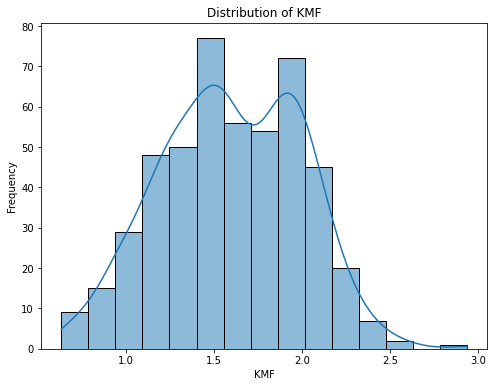

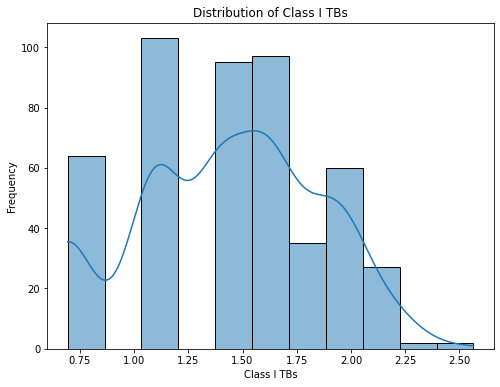

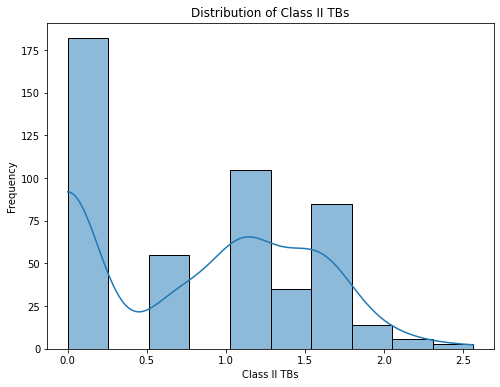

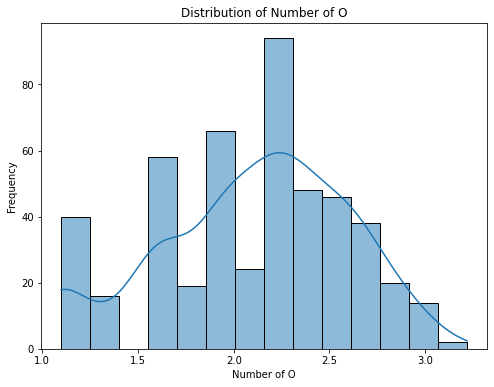

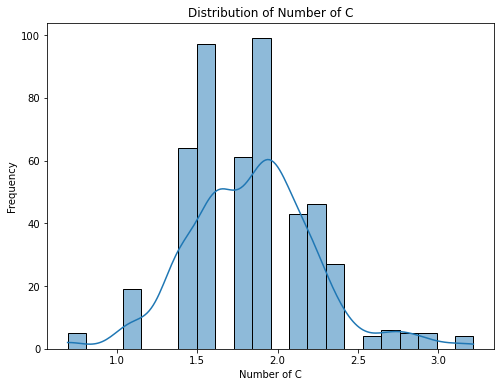

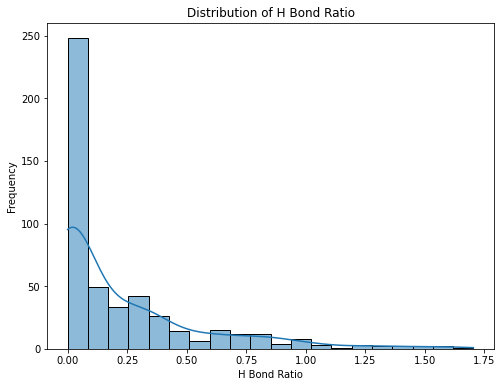

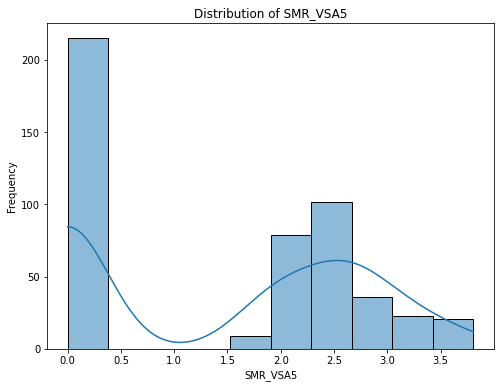

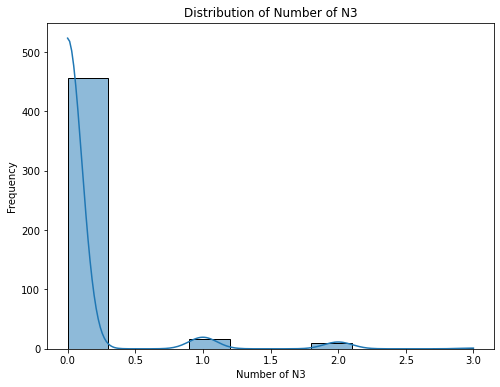

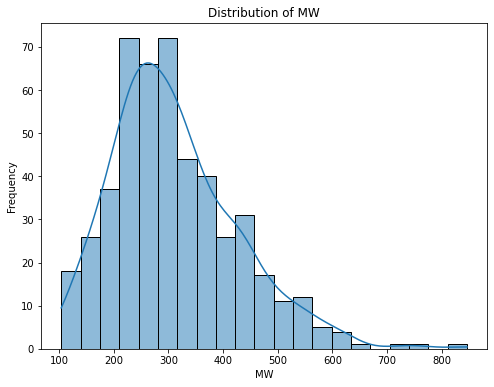

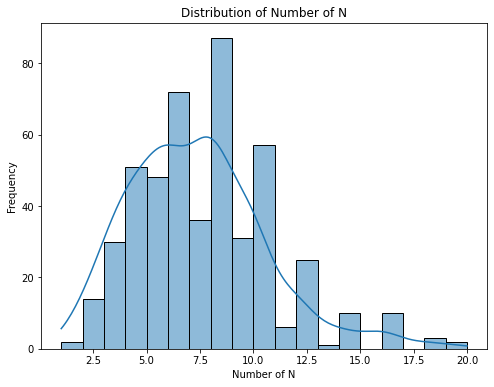

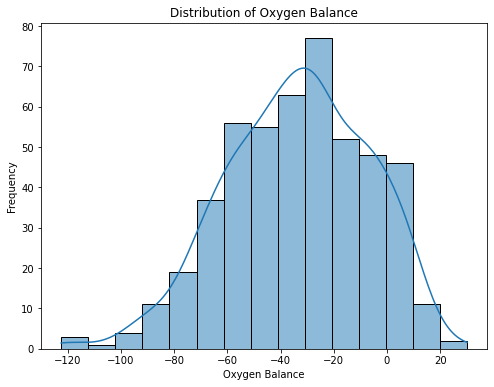

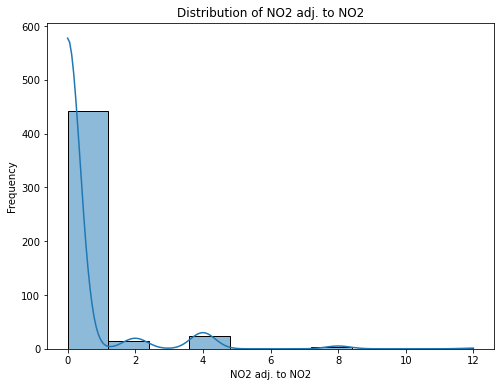

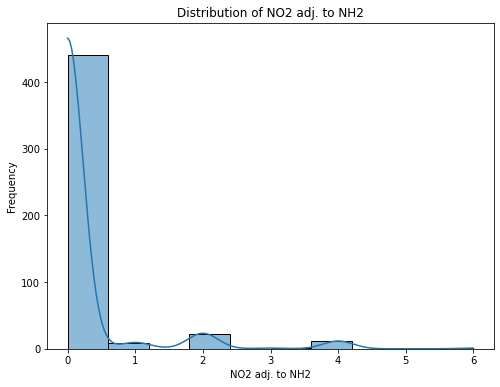

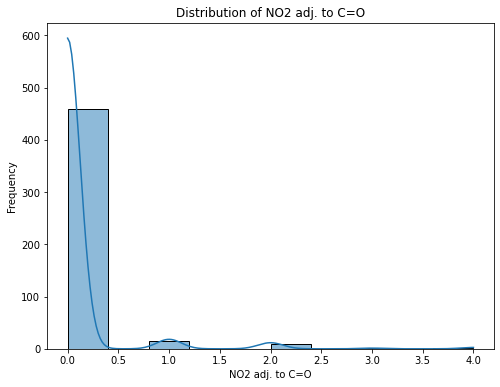

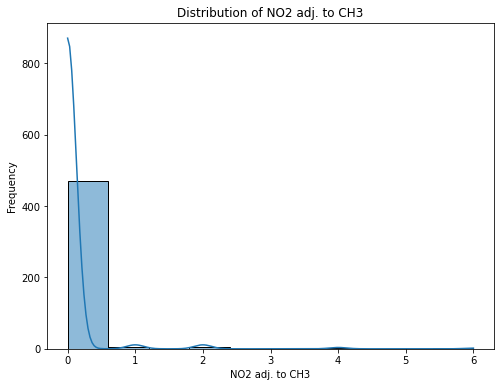

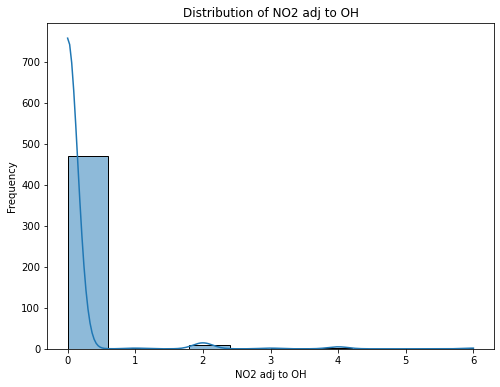

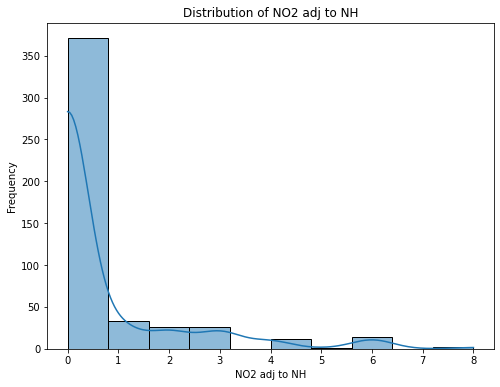

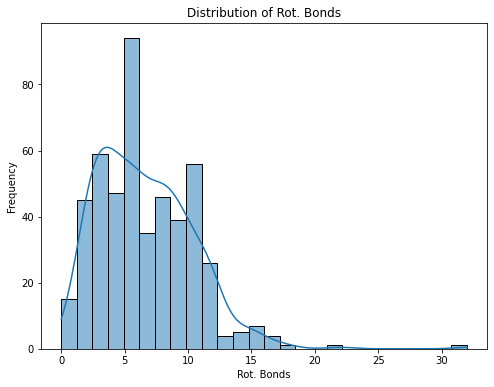

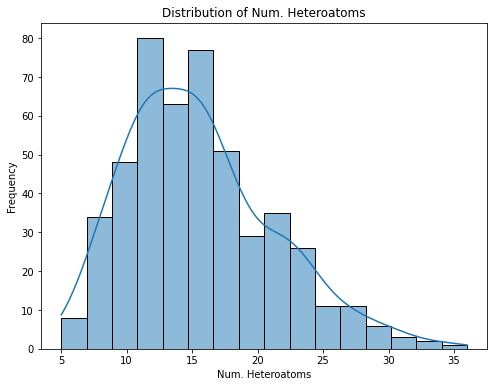

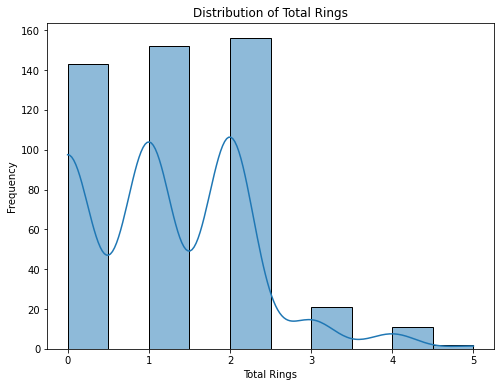

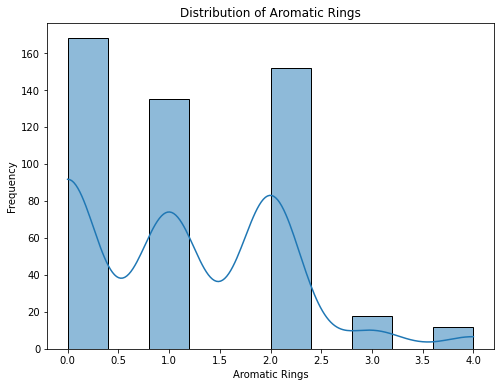

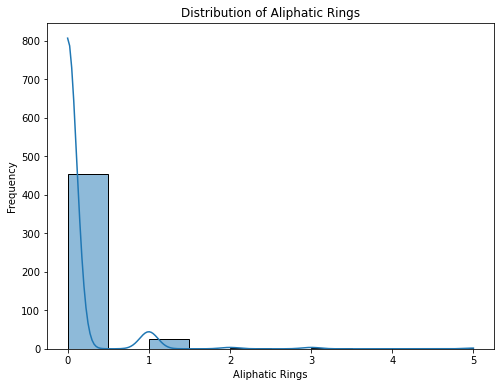

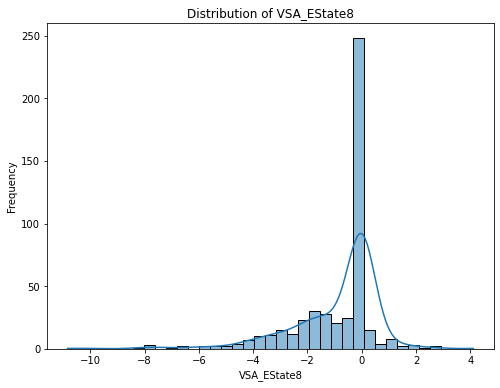

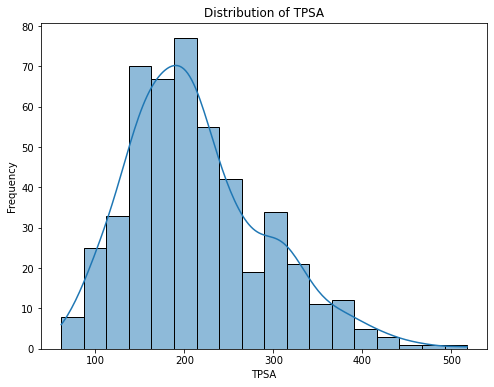

In [12]:
# Set the figure size for the subplots 
for column in columnsprocessed[:24]:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_processed[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [13]:
df_processed.to_excel(excel_writer='df_processed.xlsx', header=columnsprocessed)

In [13]:
minmaxscale = ColumnTransformer(
    transformers=[
        ('minmax', minmax_scaler, ['KMF', 'Class I TBs', 'Class II TBs', 'Number of N3', 'MW', 'H Bond Ratio',
       'Oxygen Balance', 'Num. Heteroatoms', 'Total Rings', 'Aromatic Rings', 'Aliphatic Rings', 'SMRVSA5', 'TPSA', 
                                   'Rot. Bonds','VSA_EState8', 'Number of N']),  
    ],
    remainder='passthrough'
)

In [14]:
columnsminmax = ['KMF', 'Class I TBs', 'Class II TBs', 'Number of N3', 'MW', 'H Bond Ratio', 'Oxygen Balance', 'Num. Heteroatoms',
                 'Total Rings', 'Aromatic Rings', 'Aliphatic Rings', 'SMRVSA5', 'TPSA','Rot. Bonds','VSA_EState8','Number of N', 'Number of O', 'Number of C',
                 'NO2 adj. to NO2', 'NO2 adj. to NH2', 'NO2 adj. to C=O', 'NO2 adj. to CH3', 
                 'NO2 adj to OH', 'NO2 adj to NH']
columnsminmax

['KMF',
 'Class I TBs',
 'Class II TBs',
 'Number of N3',
 'MW',
 'H Bond Ratio',
 'Oxygen Balance',
 'Num. Heteroatoms',
 'Total Rings',
 'Aromatic Rings',
 'Aliphatic Rings',
 'SMR_VSA5',
 'TPSA',
 'Rot. Bonds',
 'VSA_EState8',
 'Number of N',
 'Number of O',
 'Number of C',
 'NO2 adj. to NO2',
 'NO2 adj. to NH2',
 'NO2 adj. to C=O',
 'NO2 adj. to CH3',
 'NO2 adj to OH',
 'NO2 adj to NH']

In [15]:
pipeline2 = Pipeline(steps=[('minmaxscale', minmaxscale)])
# Fit and transform the data
df_minmax = pipeline2.fit_transform(df_processed)
df_minmax = pd.DataFrame(df_minmax,columns=columnsminmax)

In [16]:
df_minmax

,KMF,Class I TBs,Class II TBs,Number of N3,MW,H Bond Ratio,Oxygen Balance,Num. Heteroatoms,Total Rings,Aromatic Rings,...,VSA_EState8,Number of N,Number of O,Number of C,NO2 adj. to NO2,NO2 adj. to NH2,NO2 adj. to C=O,NO2 adj. to CH3,NO2 adj to OH,NO2 adj to NH
0,0.445687,0.669282,0.000000,0.0,0.328747,0.000000,0.802651,0.419355,0.2,0.25,...,0.724917,0.263158,2.564949,1.945910,12.0,0.0,0.0,0.0,0.0,0.0
1,0.361436,0.669282,1.000000,0.0,0.450112,0.000000,0.730874,0.612903,1.0,0.00,...,0.724917,0.578947,2.564949,1.945910,0.0,0.0,0.0,0.0,0.0,0.0
2,0.439340,0.489523,0.856635,0.0,0.258776,0.000000,0.661051,0.354839,0.2,0.00,...,0.470755,0.368421,2.197225,1.609438,0.0,0.0,0.0,0.0,0.0,0.0
3,0.291310,0.370310,0.758654,0.0,0.159034,0.000000,0.661051,0.225806,0.2,0.00,...,0.605911,0.263158,1.945910,1.386294,0.0,0.0,0.0,0.0,0.0,0.0
4,0.303896,0.370310,0.000000,0.0,0.165790,0.000000,0.317995,0.129032,0.2,0.25,...,0.802971,0.105263,1.945910,2.079442,0.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,0.282750,0.370310,0.000000,0.0,0.169777,0.000000,0.620395,0.193548,0.2,0.25,...,0.724917,0.157895,2.079442,1.791759,0.0,0.0,0.0,0.0,0.0,0.0
481,0.681968,0.803545,0.000000,0.0,0.696799,0.112072,0.439860,0.709677,0.6,0.75,...,0.724917,0.526316,2.833213,2.890372,0.0,0.0,0.0,0.0,0.0,6.0
482,0.624358,0.669282,0.000000,0.0,0.575564,0.138665,0.279749,0.516129,0.6,0.75,...,0.724917,0.421053,2.564949,2.890372,0.0,0.0,0.0,0.0,0.0,4.0
483,0.243177,0.370310,0.000000,0.0,0.152271,0.069091,0.633631,0.193548,0.2,0.25,...,0.724917,0.210526,1.945910,1.609438,0.0,0.0,0.0,0.0,0.0,0.0


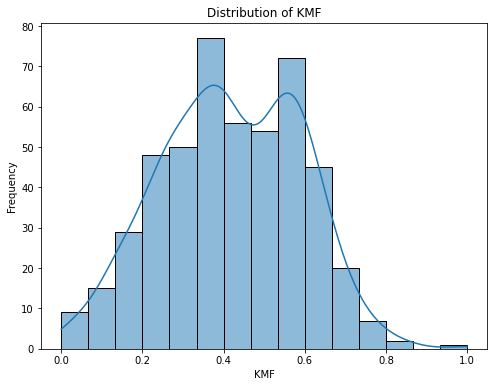

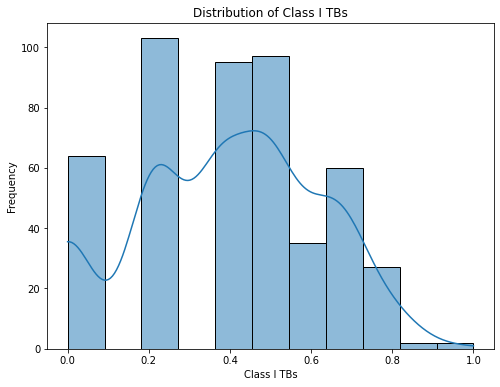

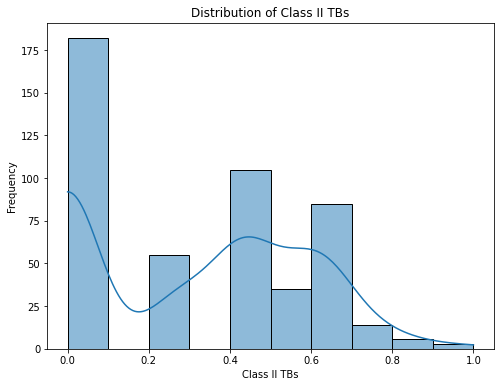

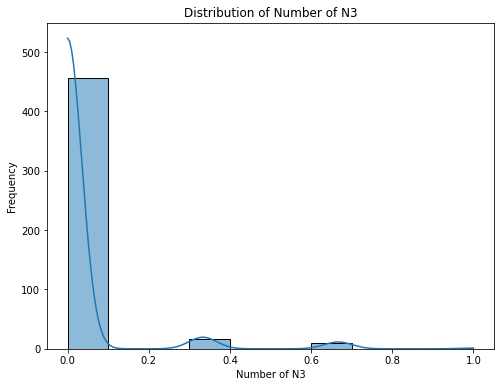

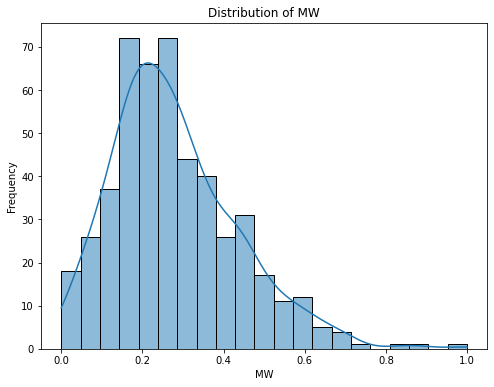

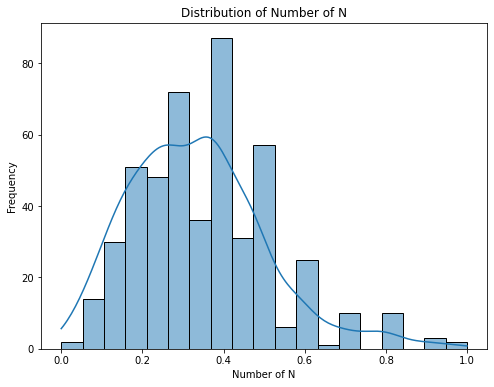

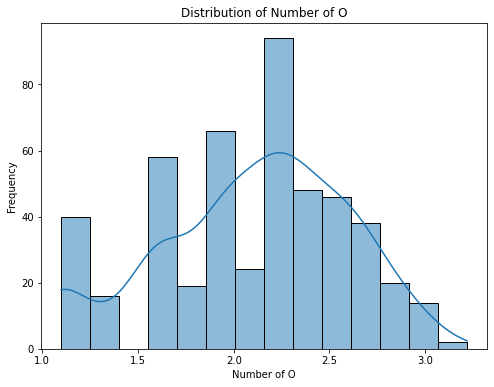

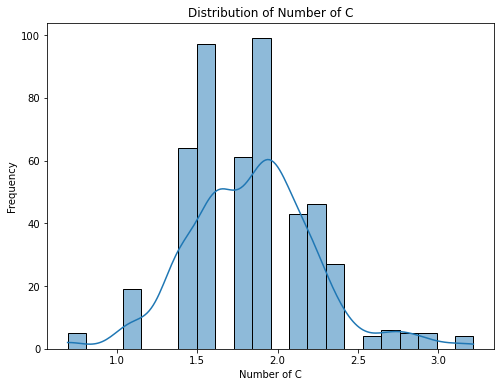

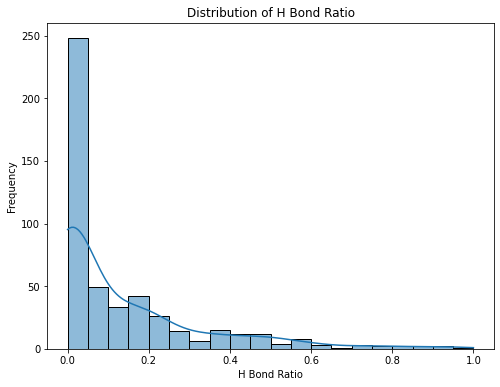

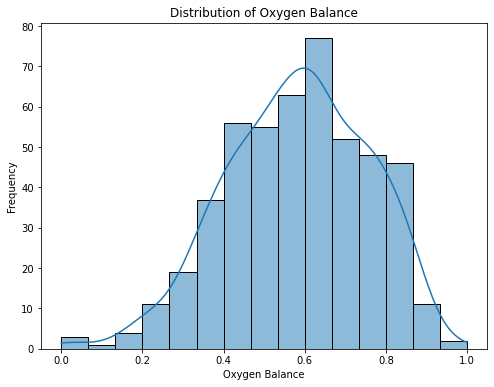

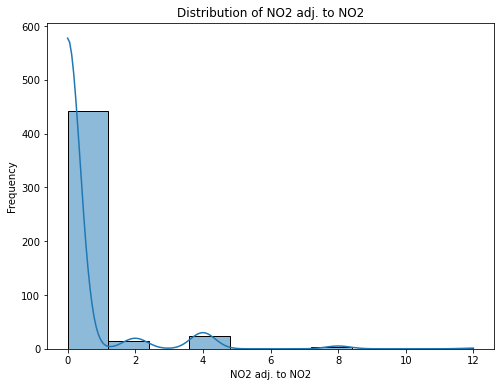

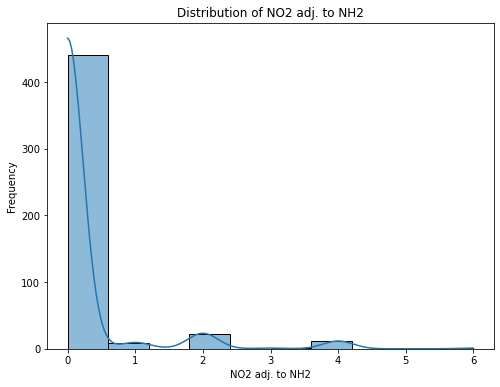

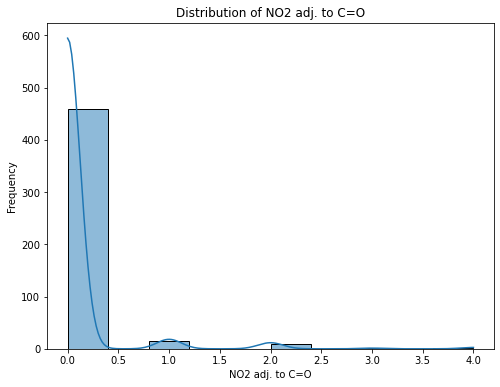

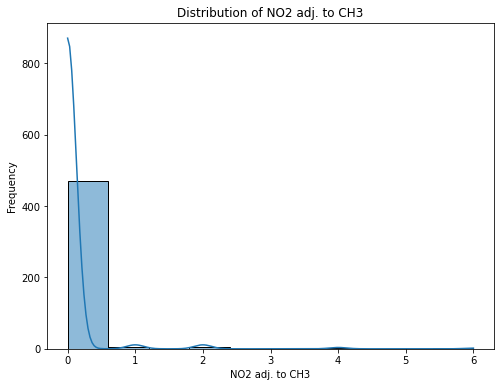

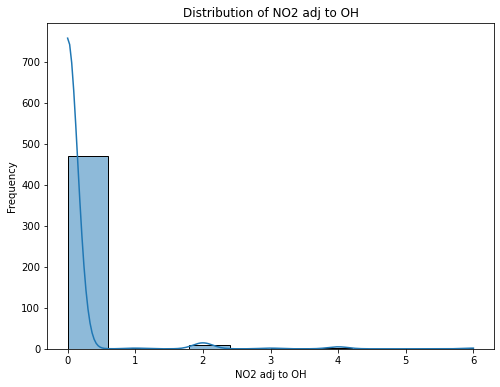

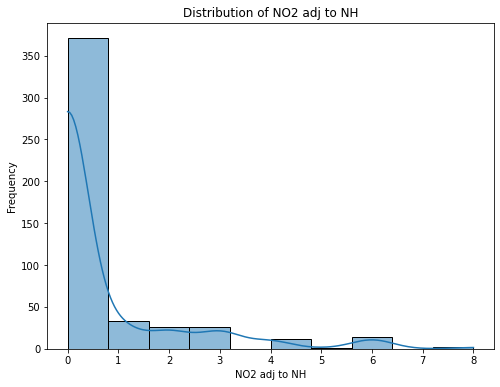

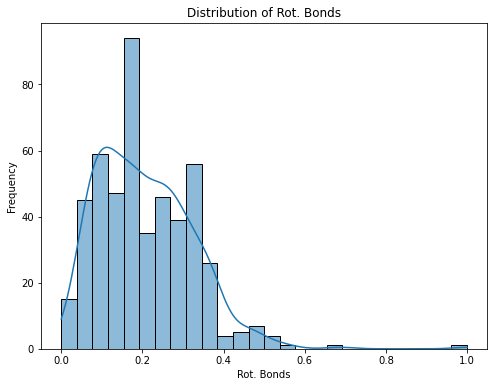

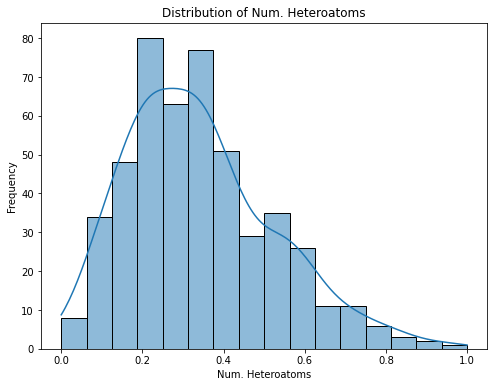

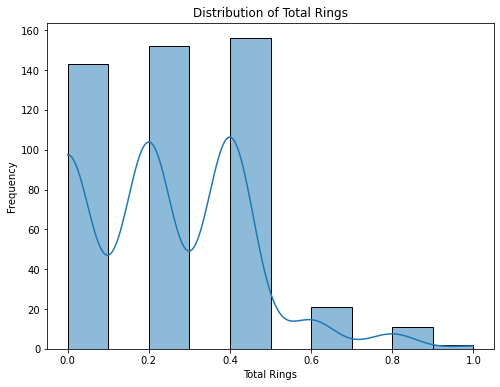

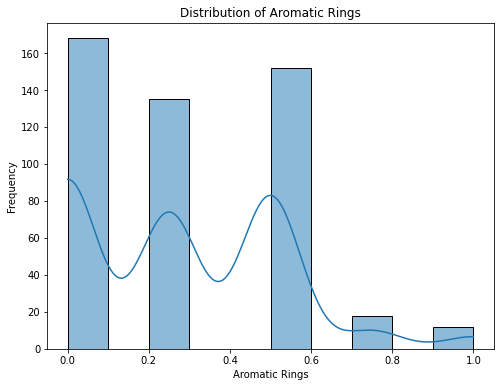

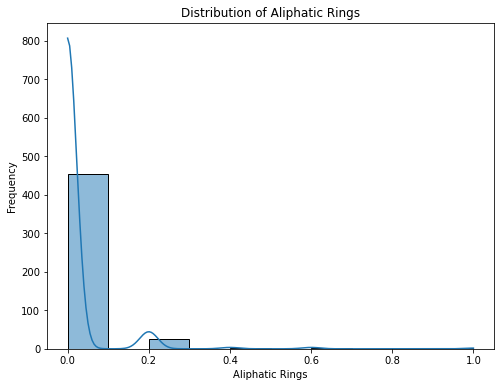

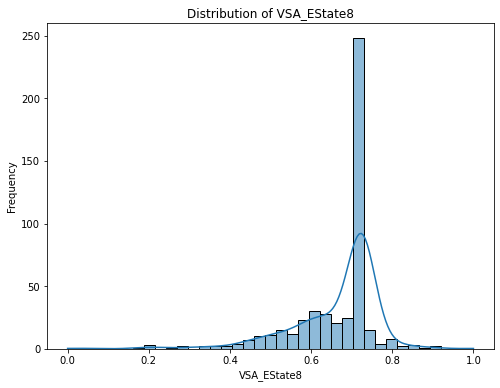

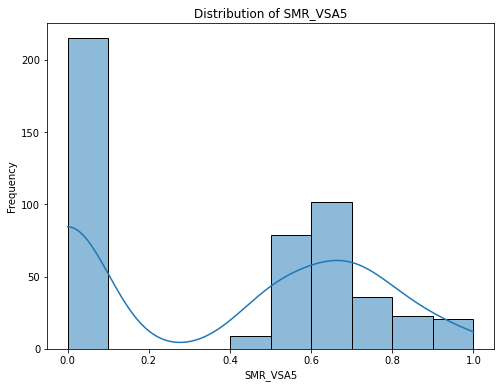

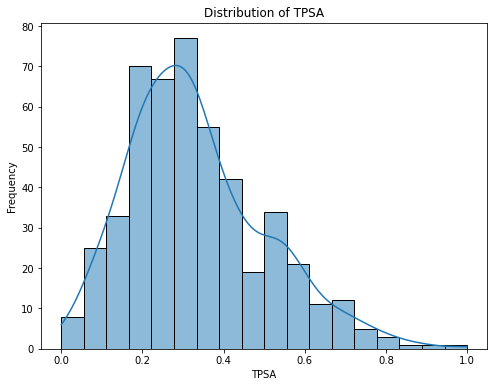

In [17]:
# Set the figure size for the subplots 
for column in columns[:24]:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_minmax[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [18]:
df_minmax.to_excel(excel_writer='df_minmax.xlsx', header=columnsminmax)